In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.style.use('ggplot')

import nltk

In [2]:
# Read in data
#df = pd.concat(map(pd.read_csv, ['C:/faks/opj/realtalk.csv', 'C:/faks/opj/sarcasm.csv','C:/faks/opj/humor.csv', 'C:/faks/opj/irony.csv']))
#df = pd.read_csv('C:/faks/opj/all.csv')
dfSarcasm = pd.read_csv('C:/faks/opj/projekt/sarcasm.csv')
dfRealtalk = pd.read_csv('C:/faks/opj/projekt/realtalk.csv')
dfHumour = pd.read_csv('C:/faks/opj/projekt/humor.csv')
dfIrony = pd.read_csv('C:/faks/opj/projekt/irony.csv')
dfIrony.columns = ['Tweets']
dfRealtalk.columns = ['Tweets']
dfHumour.columns = ['Tweets']
dfSarcasm.columns = ['Tweets']
dfIrony.shape

(951021, 1)

In [4]:
dfHumour.shape

(803707, 1)

In [5]:
dfSarcasm.shape

(999999, 1)

In [7]:
dfRealtalk.shape

(1999999, 1)

In [9]:
#read in lexicon
lexicon = pd.read_csv('C:/faks/opj/projekt/NRC-VAD-Lexicon/NRC-VAD-Lexicon/NRC-VAD-Lexicon.txt', sep="\t", header=None)
lexicon.columns = ["word", "valence", "arousal", "dominance"]

In [36]:
#print(lexicon)

In [10]:
emotionLexicon = pd.read_csv('C:/faks/opj/projekt/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-ForVariousLanguages.txt', sep="\t", header=None, low_memory=False, skiprows=[0])
emotionLexicon.columns = ["word", "anger", "anticipation", "disgust", "fear", "joy", "negative", "positive", "sadness", "surprise", "trust", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
#print(emotionLexicon)
#print(len(emotionLexicon.columns))

In [11]:
#micemo zadnjih 108 stupaca jer su to prijevodi rijeci na druge jezike
emotionLexicon.drop(columns=emotionLexicon.columns[-107:], axis=1, inplace=True)
#print(emotionLexicon)
#print(len(emotionLexicon.columns))

In [39]:
#i je 0,1,2,3, ..., 19970 
#row je kao cijeli redak u rjecniku
#row[0]='something', row[1]=valence value, row[2]=arousal value, row[3]=dominance value
#row['word'] == row[0], tj. to nam da baš vrijednosti prvog stupca koji se zove 'word'

#for i, row in lexicon.iterrows():
#    word = row['word']
#    print(i, word)
        
        

In [40]:
# bezveze isprobavala uvjet
# if (emotionLexicon['word'].eq('amused')).any():
#        print(emotionLexicon['word'])

In [12]:
#dfHumour = df[df['Tweets'].str.contains('humour')] 
dfHumour


,Tweets
0,"""I'm not going to wear a red dress,"" she said...."
1,I gave him my #ratchetness #yikes #lmao #humor...
2,"🥱✨: Find you one that can cook , clean etc......"
3,🥱✨: Buffoonery 🤦 Ikr at the highest 🤣😭 #Humor ...
4,An old @incellectuals minion almost decided to...
...,...
803702,is submitting a police report because someone ...
803703,"#humor ""I hate- When ppl say ""life is short"". ..."
803704,ubuntu respects your privacy. no webcam suppor...
803705,#humor My mom walked to Ralphs across the stre...


In [11]:
#dfHumour.values

In [13]:
#dfSarcasm = df[df['Tweets'].str.contains('sarcasm')] 
dfSarcasm

,Tweets
0,"Breaking News!After Captain Bana Singh, PVC jo..."
1,@DrProudman I'm surprised at their creativity....
2,@Arshdee64795059 @RVCJ_FB @BCCI #Sarcasm tha bro
3,They are beating most wanted Criminal! #Sarcas...
4,"@Aaayushiiiiiii Oh, just the usual, taking ove..."
...,...
999994,Life is great when you come home from work &am...
999995,I'm on a boat. #Sarcasm
999996,I don't know how you can be a gamer without Ga...
999997,@chrispychicken3 @jakequery @Schultz1260 I agr...


In [14]:
#dfIrony = df[df['Tweets'].str.contains('irony')] 
dfIrony

,Tweets
0,"Science is like a game of whack-a-mole, every ..."
1,@UrSomeboyYouHi Why can’t everyone be as matur...
2,@PackagingSci My fav is the scissors brand des...
3,@duponline @J_Donaldson_MP Why can’t everyone ...
4,@JamieBrysonCPNI @J_Donaldson_MP Why can’t eve...
...,...
951016,Death to hashtags. #protest #irony
951017,@filatoff of course! I live off the free food ...
951018,"a little surprised that FOWAMiami08 ""Launch a ..."
951019,@klauseck not what i meant #irony #isthatworth...


In [15]:
#dfRealtalk = df[df['Tweets'].str.contains('realtalk')] 
dfRealtalk

,Tweets
0,My biggest pet peeve working out is when peopl...
1,"@misterbumface @Wulf_Helm No, they usually end..."
2,Never under any circumstance underestimate the...
3,@CoachFeeny @Devin02_ @MLB @Cardinals @ABREG_1...
4,Crop circles are .@cryptolic_' way of telling...
...,...
1999994,"""I'm a pervert, I'm not BLIND..."" #realtalk #m..."
1999995,If you're going to make an accusation I expect...
1999996,if Pain wasn't sick when he fought Nine Tailed...
1999997,@Duchess_Tweets just went down ur TL and ur on...


# VAD ANALYSIS

In [16]:
import math
from decimal import Decimal


In [17]:
humourCooc = {}
sarcasmCooc = {}
ironyCooc = {}
realtalkCooc = {}
for i, row in lexicon.iterrows():
    word = row['word']
    totalCount = 0
    #if (emotionLexicon['word'].eq(word)).any(): #provjeravam postoji li ta rijec u Emotion Lexiconu
    try :
        totalCount += len(dfIrony[dfIrony['Tweets'].str.contains(word)])
        totalCount += len(dfRealtalk[dfRealtalk['Tweets'].str.contains(word)])
        totalCount += len(dfSarcasm[dfSarcasm['Tweets'].str.contains(word)])
        totalCount += len(dfHumour[dfHumour['Tweets'].str.contains(word)])

        #print(word, totalCount)
        if totalCount > 100 : #ako se rijec pojavila vise od 100 puta
            #print(word, totalCount)
            humourCount = len(dfHumour[dfHumour['Tweets'].str.contains(word)])
            #print(word, ' H ', humourCount)
            sarcasmCount = len(dfSarcasm[dfSarcasm['Tweets'].str.contains(word)])
            #print(word, ' S ',sarcasmCount)
            ironyCount = len(dfIrony[dfIrony['Tweets'].str.contains(word)])
            #print(word, ' I ', ironyCount)
            realtalkCount = len(dfRealtalk[dfRealtalk['Tweets'].str.contains(word)])
            #print(word, ' R ',realtalkCount)
            humourNum = humourCount / (totalCount * len(dfHumour))
            sarcasmNum = sarcasmCount / (totalCount * len(dfSarcasm))
            ironyNum = ironyCount / (totalCount * len(dfIrony))
            realtalkNum = realtalkCount / (totalCount * len(dfRealtalk))
            try :
                humourCooc[i] = { 'word' : word,
                          'result' : math.log2(humourNum),
                          'valence' : row['valence'],
                          'arousal' : row['arousal'],
                          'dominance' : row['dominance']
                }
            except(ValueError):
                humourCooc[i] = { 'word' : word,
                          'result' : 0,
                          'valence' : row['valence'],
                          'arousal' : row['arousal'],
                          'dominance' : row['dominance']
                }
            try :
                sarcasmCooc[i] = {'word': word,
                          'result' : math.log2(sarcasmNum),
                           'valence' : row['valence'],
                           'arousal' : row['arousal'],
                           'dominance' : row['dominance']
                }
            except(ValueError):
                sarcasmCooc[i] = {'word': word,
                          'result' : 0,
                           'valence' : row['valence'],
                           'arousal' : row['arousal'],
                           'dominance' : row['dominance']
                }
            try :
                ironyCooc[i] = {'word':word,
                            'result' : math.log2(ironyNum),
                            'valence' : row['valence'],
                           'arousal' : row['arousal'],
                           'dominance' : row['dominance']
                }
            except(ValueError):
                ironyCooc[i] = {'word':word,
                            'result' : 0,
                            'valence' : row['valence'],
                           'arousal' : row['arousal'],
                           'dominance' : row['dominance']
                }
            try :
                realtalkCooc[i] = {'word':word,
                            'result' : math.log2(realtalkNum),
                            'valence' : row['valence'],
                           'arousal' : row['arousal'],
                           'dominance' : row['dominance']
                }
            except(ValueError):
                realtalkCooc[i] = {'word':word,
                            'result' : 0,
                            'valence' : row['valence'],
                           'arousal' : row['arousal'],
                           'dominance' : row['dominance']
                }
    except(TypeError):
        print(word, totalCount, 'broken')
        

nan 0 broken


In [19]:
#bezveze ispis


"""for key in humourCooc:
    print(key, '->', humourCooc[key])"""

print(len(humourCooc))
print(len(ironyCooc))
print(len(realtalkCooc))
print(len(sarcasmCooc))


10974
10974
10974
10974


In [22]:
#.T je transponiranje
humourCoocDf = pd.DataFrame(humourCooc).T
sarcasmCoocDf = pd.DataFrame(sarcasmCooc).T
ironyCoocDf = pd.DataFrame(ironyCooc).T
realtalkCoocDf = pd.DataFrame(realtalkCooc).T

In [23]:
#humour vs sarcasm
vadResults = {}

for i, row in humourCoocDf.iterrows() : 
    #print(i)
    sarcasmNum = sarcasmCoocDf._get_value(i, 'result')
    humourNum = row['result']
    tempRes = sarcasmNum - humourNum
    vadResults[i] = {
        'result' : tempRes,
        'valence' : row['valence'],
        'arousal' : row['arousal'], 
        'dominance' : row['dominance']
    }

In [20]:
#vadResults

Text(0, 15, 'sarcasm')

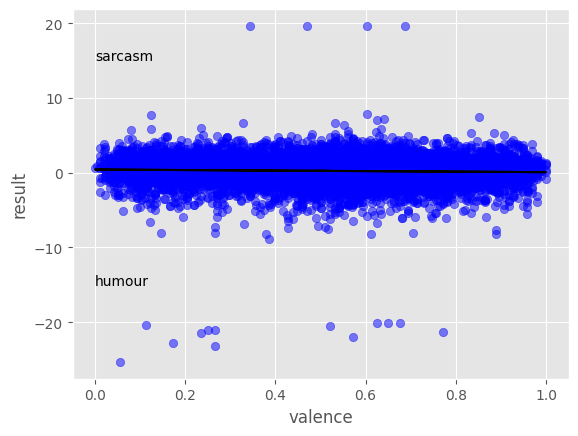

In [62]:
#vad humour-sarcasm difference
vadHSDf = pd.DataFrame(vadResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=vadHSDf.result.values.reshape(-1, 1)

X=vadHSDf.valence.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("valence")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("sarcasm", (0,15))

#vadHSDf.plot.scatter(x='dominance', y='result', c="red", alpha=0.5)
#vadHSDf.plot.scatter(x='arousal', y='result', c="green", alpha=0.5)

Text(0, 15, 'sarcasm')

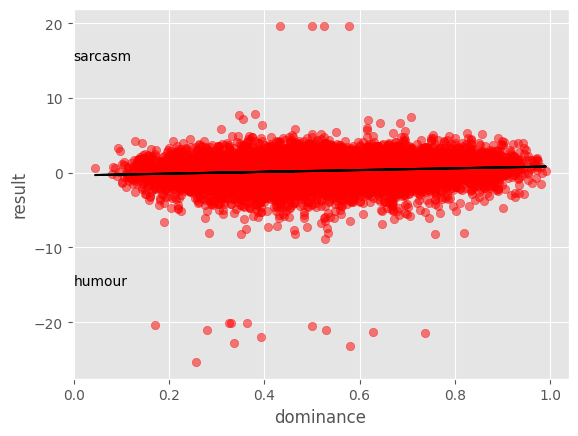

In [63]:
#vad humour-sarcasm difference
vadHSDf = pd.DataFrame(vadResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=vadHSDf.result.values.reshape(-1, 1)
X=vadHSDf.dominance.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("dominance")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("sarcasm", (0,15))

Text(0, 15, 'sarcasm')

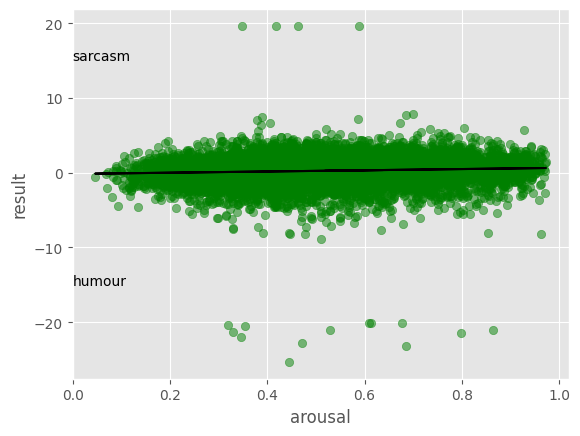

In [64]:
#vad humour-sarcasm difference
vadHSDf = pd.DataFrame(vadResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=vadHSDf.result.values.reshape(-1, 1)
X=vadHSDf.arousal.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("arousal")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("sarcasm", (0,15))

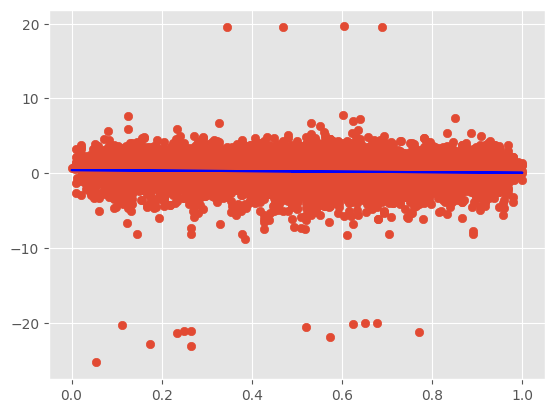

In [43]:
linear_regressor = LinearRegression()  # create object for the class
Y=vadHSDf.result.values.reshape(-1, 1)
X=vadHSDf.valence.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')
#vadHSDf.plt.show()


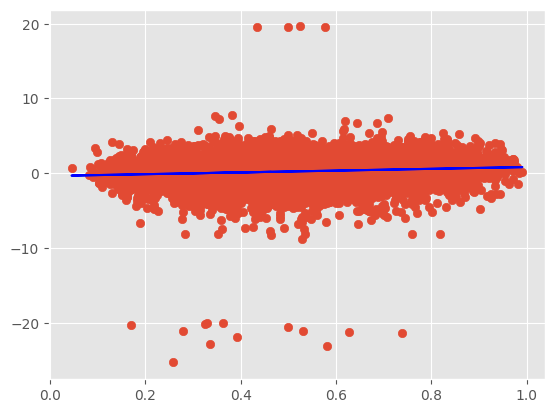

In [44]:
linear_regressor = LinearRegression()  # create object for the class
Y=vadHSDf.result.values.reshape(-1, 1)
X=vadHSDf.dominance.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')

In [22]:
#vadHSDf

In [65]:
#humour vs irony
vadResults = {}

for i, row in humourCoocDf.iterrows() : 
    ironyNum = ironyCoocDf._get_value(i, 'result')
    humourNum = row['result']
    tempRes = ironyNum - humourNum
    vadResults[i] = {
        'result' : tempRes,
        'valence' : row['valence'],
        'arousal' : row['arousal'], 
        'dominance' : row['dominance']
    }

Text(0, 15, 'irony')

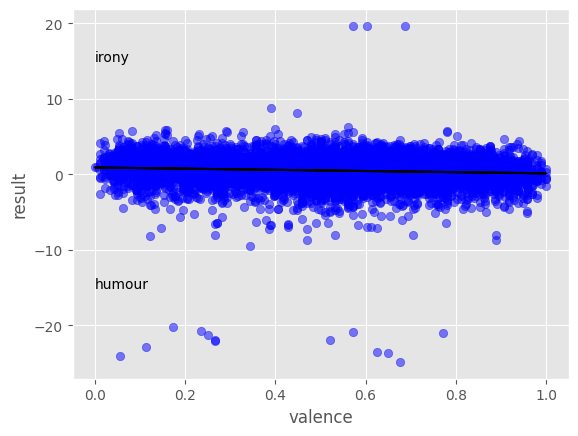

In [68]:
#vad humour-irony difference
vadHIDf = pd.DataFrame(vadResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=vadHIDf.result.values.reshape(-1, 1)

X=vadHIDf.valence.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("valence")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

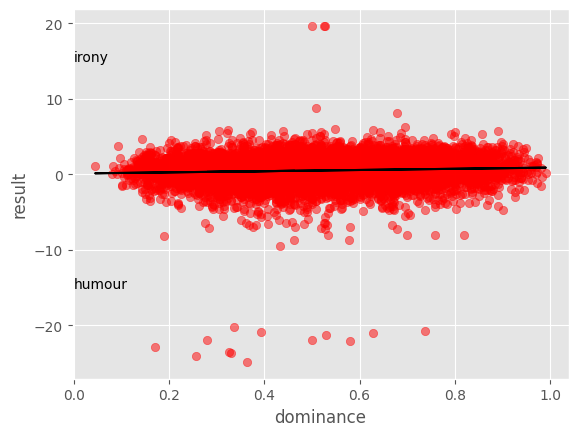

In [70]:
X=vadHIDf.dominance.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("dominance")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

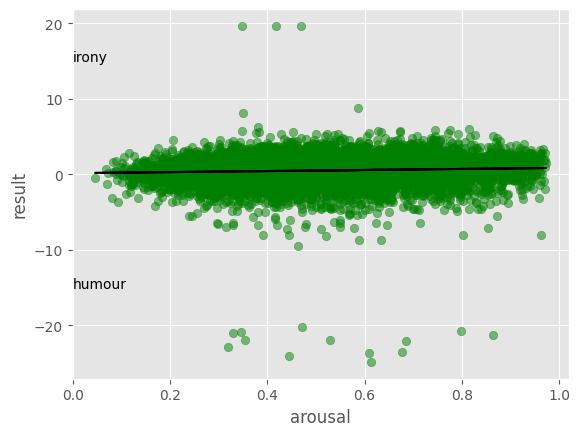

In [71]:
X=vadHIDf.arousal.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("arousal")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("irony", (0,15))

In [72]:
#humour vs realtalk
vadResults = {}

for i, row in humourCoocDf.iterrows() : 
    realtalkNum = realtalkCoocDf._get_value(i, 'result')
    humourNum = row['result']
    tempRes = realtalkNum - humourNum
    vadResults[i] = {
        'result' : tempRes,
        'valence' : row['valence'],
        'arousal' : row['arousal'], 
        'dominance' : row['dominance']
    }

<AxesSubplot: xlabel='arousal', ylabel='result'>

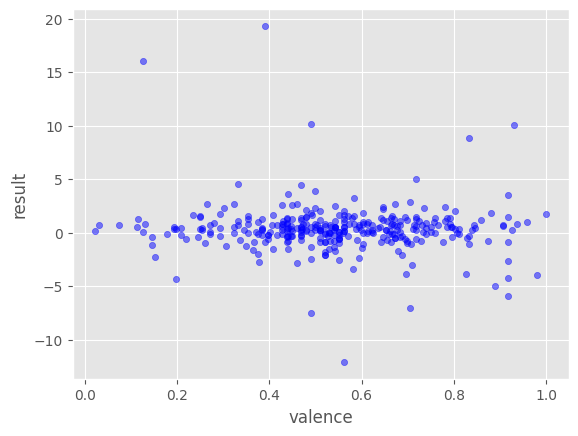

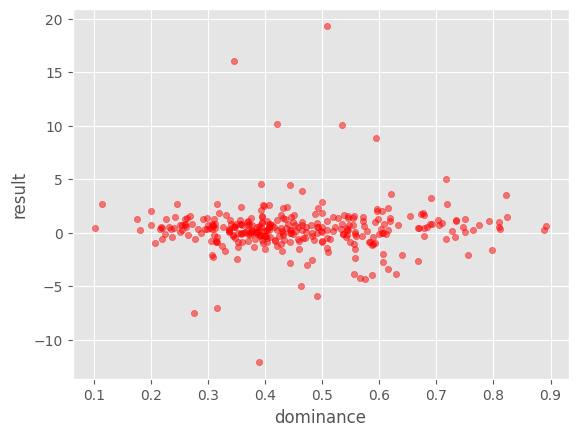

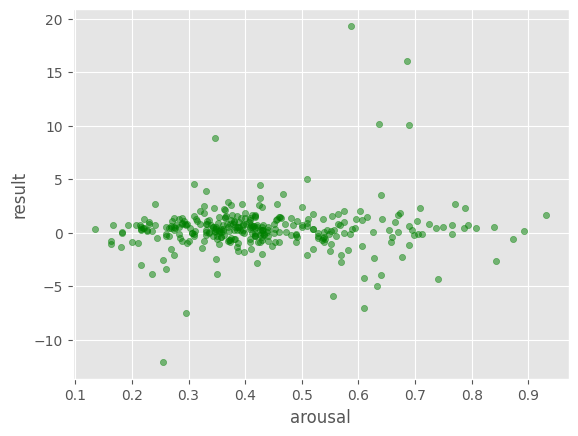

In [26]:
#vad humour-realtalk difference
vadHRDf = pd.DataFrame(vadResults).T
vadHRDf.plot.scatter(x='valence', y='result', c="blue", alpha=0.5)
vadHRDf.plot.scatter(x='dominance', y='result', c="red", alpha=0.5)
vadHRDf.plot.scatter(x='arousal', y='result', c="green", alpha=0.5)

Text(0, 15, 'realtalk')

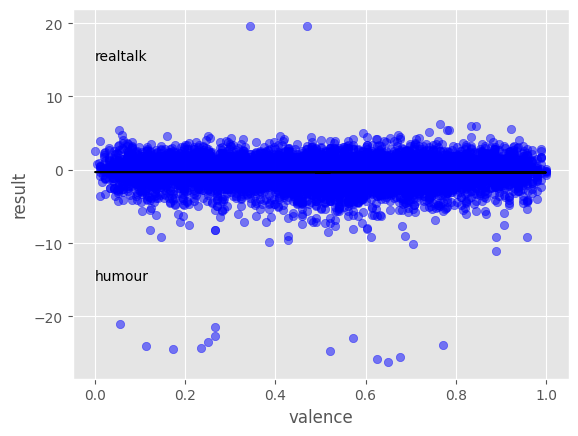

In [73]:
vadHRDf = pd.DataFrame(vadResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=vadHRDf.result.values.reshape(-1, 1)

X=vadHRDf.valence.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("valence")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("realtalk", (0,15))

Text(0, 15, 'realtalk')

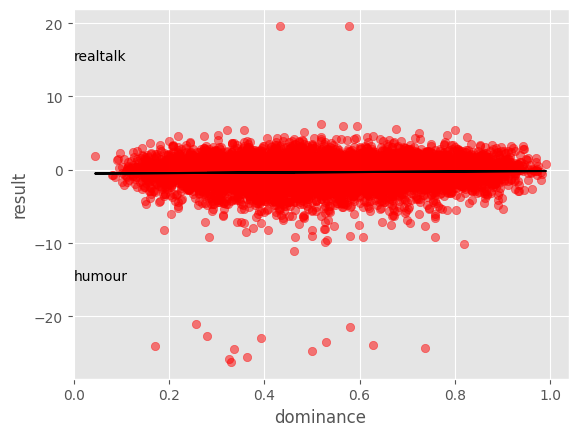

In [74]:
X=vadHRDf.dominance.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("dominance")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("realtalk", (0,15))

Text(0, 15, 'realtalk')

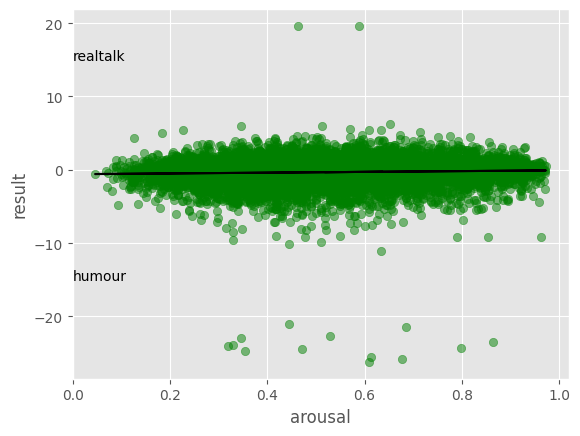

In [75]:
X=vadHRDf.arousal.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("arousal")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("realtalk", (0,15))

In [76]:
#sarcasm vs irony
vadResults = {}

for i, row in sarcasmCoocDf.iterrows() : 
    ironyNum = ironyCoocDf._get_value(i, 'result')
    sarcasmNum = row['result']
    tempRes = ironyNum - sarcasmNum
    vadResults[i] = {
        'result' : tempRes,
        'valence' : row['valence'],
        'arousal' : row['arousal'], 
        'dominance' : row['dominance']
    }

Text(0, 15, 'irony')

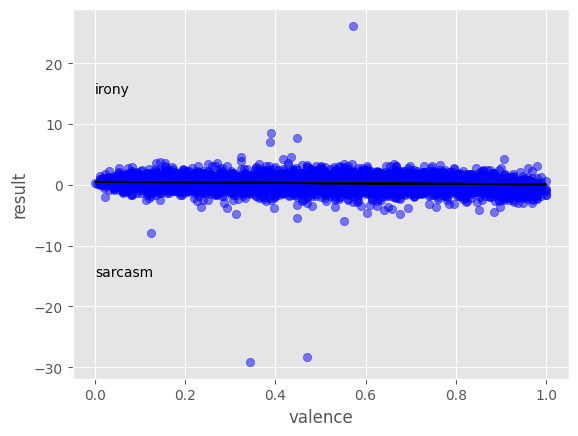

In [77]:
vadSIDf = pd.DataFrame(vadResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=vadSIDf.result.values.reshape(-1, 1)

X=vadSIDf.valence.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("valence")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

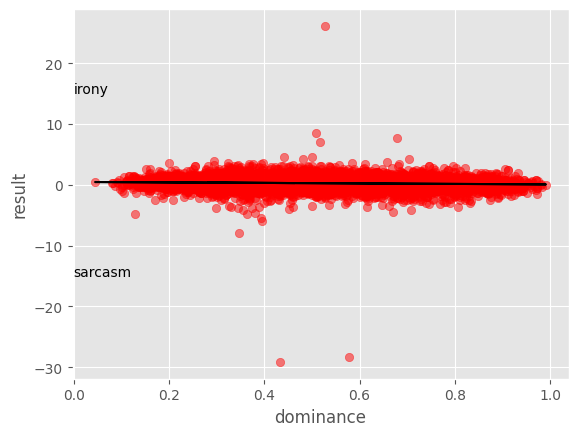

In [78]:
X=vadSIDf.dominance.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("dominance")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

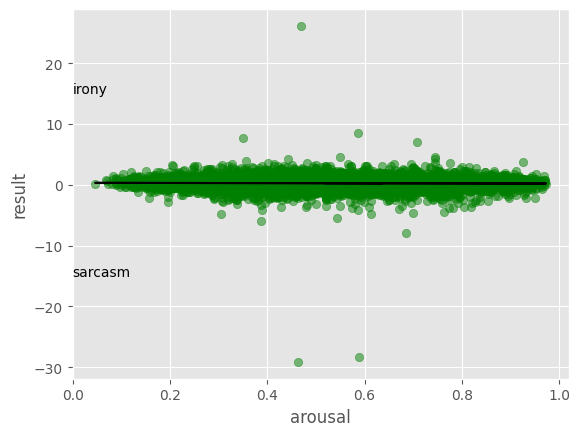

In [79]:
X=vadSIDf.arousal.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("arousal")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("irony", (0,15))

<AxesSubplot: xlabel='arousal', ylabel='result'>

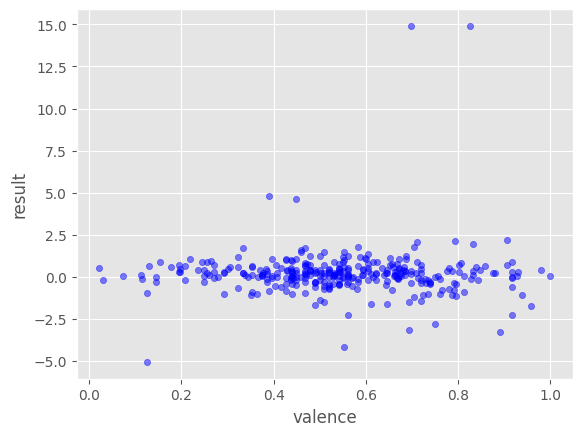

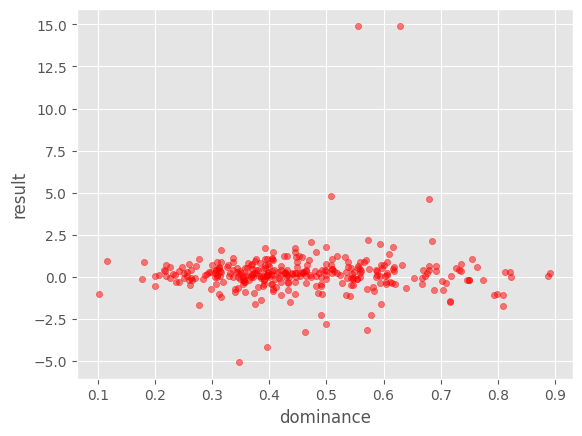

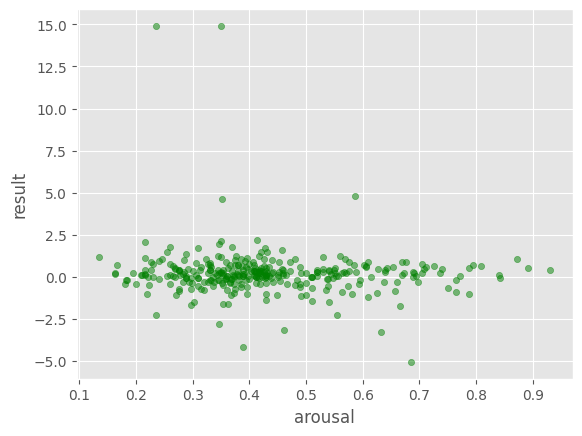

In [28]:
#vad sarcasm-irony difference
vadSIDf = pd.DataFrame(vadResults).T
vadSIDf.plot.scatter(x='valence', y='result', c="blue", alpha=0.5)
vadSIDf.plot.scatter(x='dominance', y='result', c="red", alpha=0.5)
vadSIDf.plot.scatter(x='arousal', y='result', c="green", alpha=0.5)

In [80]:
#sarcasm vs realtalk
vadResults = {}

for i, row in sarcasmCoocDf.iterrows() : 
    realtalkNum = realtalkCoocDf._get_value(i, 'result')
    sarcasmNum = row['result']
    tempRes = realtalkNum - sarcasmNum
    vadResults[i] = {
        'result' : tempRes,
        'valence' : row['valence'],
        'arousal' : row['arousal'], 
        'dominance' : row['dominance']
    }

Text(0, 6, 'realtalk')

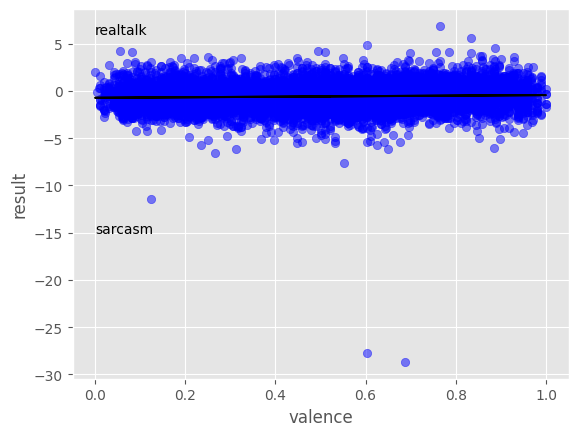

In [82]:
vadSRDf = pd.DataFrame(vadResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=vadSRDf.result.values.reshape(-1, 1)

X=vadSRDf.valence.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("valence")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("realtalk", (0,6))

Text(0, 6, 'realtalk')

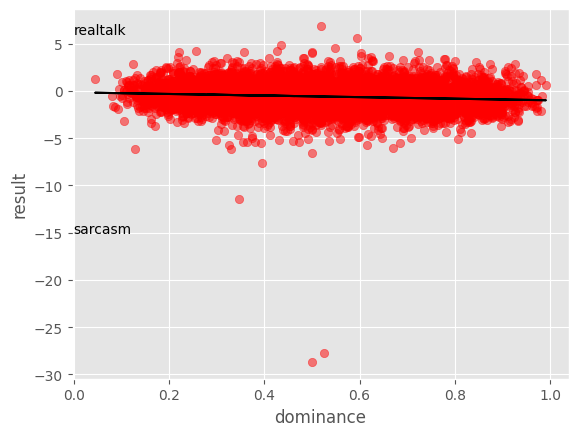

In [83]:
X=vadSRDf.dominance.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("dominance")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("realtalk", (0,6))

Text(0, 6, 'realtalk')

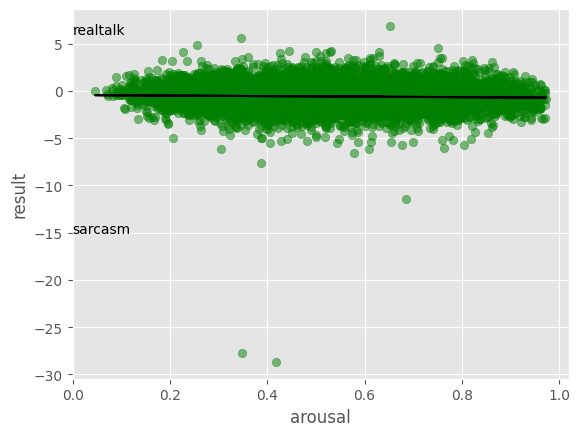

In [84]:
X=vadSRDf.arousal.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("arousal")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("realtalk", (0,6))

<AxesSubplot: xlabel='arousal', ylabel='result'>

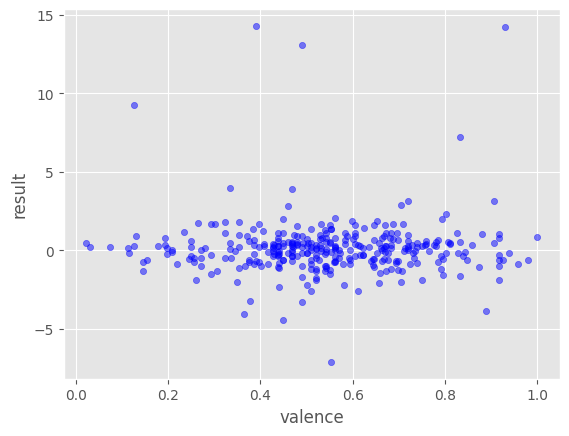

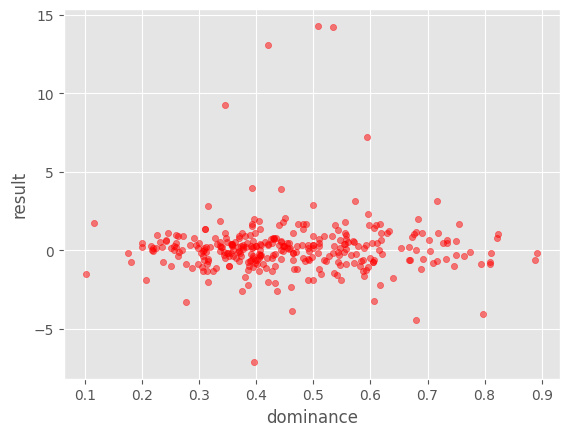

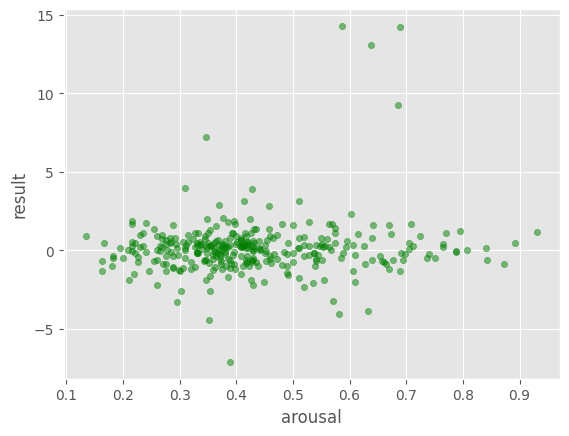

In [30]:
#vad sarcasm-realtalk difference
vadSRDf = pd.DataFrame(vadResults).T
vadSRDf.plot.scatter(x='valence', y='result', c="blue", alpha=0.5)
vadSRDf.plot.scatter(x='dominance', y='result', c="red", alpha=0.5)
vadSRDf.plot.scatter(x='arousal', y='result', c="green", alpha=0.5)

In [85]:
#irony vs realtalk
vadResults = {}

for i, row in ironyCoocDf.iterrows() : 
    realtalkNum = realtalkCoocDf._get_value(i, 'result')
    ironyNum = row['result']
    tempRes = realtalkNum - ironyNum
    vadResults[i] = {
        'result' : tempRes,
        'valence' : row['valence'],
        'arousal' : row['arousal'], 
        'dominance' : row['dominance']
    }

Text(0, 15, 'irony')

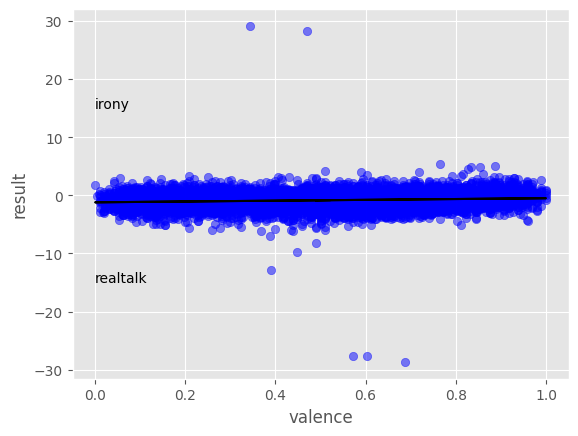

In [86]:
vadIRDf = pd.DataFrame(vadResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=vadIRDf.result.values.reshape(-1, 1)

X=vadIRDf.valence.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("valence")
plt.ylabel("result")
plt.annotate("realtalk", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

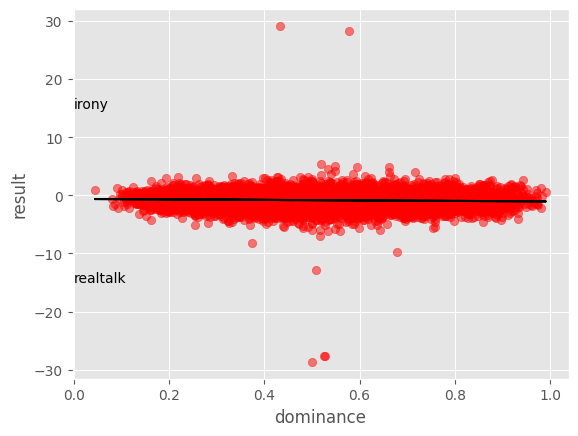

In [87]:
X=vadIRDf.dominance.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("dominance")
plt.ylabel("result")
plt.annotate("realtalk", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

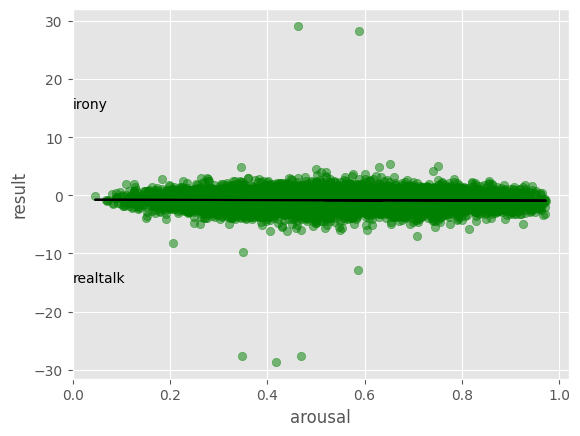

In [88]:
X=vadIRDf.arousal.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("arousal")
plt.ylabel("result")
plt.annotate("realtalk", (0,-15))
plt.annotate("irony", (0,15))

<AxesSubplot: xlabel='arousal', ylabel='result'>

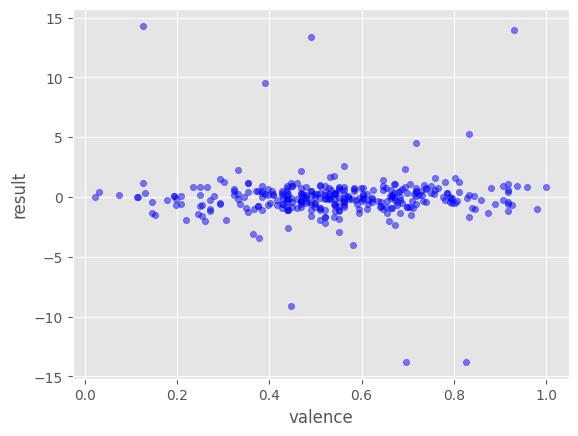

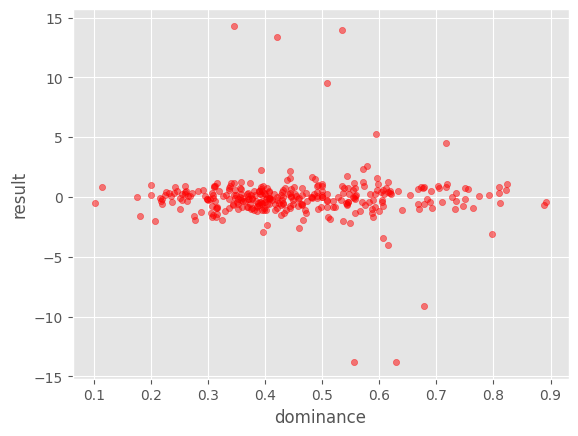

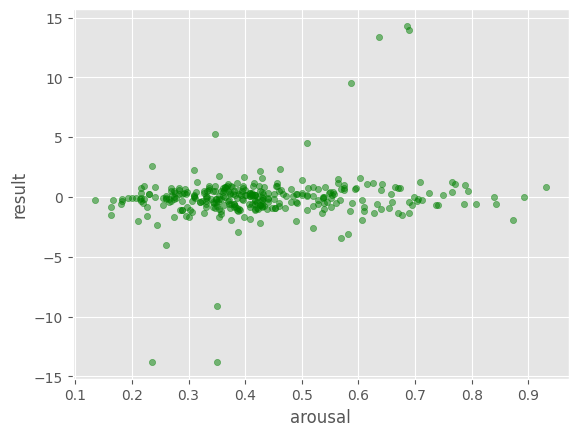

In [32]:
#vad irony-realtalk difference
vadIRDf = pd.DataFrame(vadResults).T
vadIRDf.plot.scatter(x='valence', y='result', c="blue", alpha=0.5)
vadIRDf.plot.scatter(x='dominance', y='result', c="red", alpha=0.5)
vadIRDf.plot.scatter(x='arousal', y='result', c="green", alpha=0.5)

# EMOTION ANALYSIS

In [89]:
humourCooc = {}
sarcasmCooc = {}
ironyCooc = {}
realtalkCooc = {}
for i, row in emotionLexicon.iterrows():
    word = row['word']
    totalCount = 0
    #if (lexicon['word'].eq(word)).any(): #provjeravam postoji li ta rijec u VAD Lexiconu
    try :
        totalCount += len(dfIrony[dfIrony['Tweets'].str.contains(word)])
        totalCount += len(dfRealtalk[dfRealtalk['Tweets'].str.contains(word)])
        totalCount += len(dfSarcasm[dfSarcasm['Tweets'].str.contains(word)])
        totalCount += len(dfHumour[dfHumour['Tweets'].str.contains(word)])
        if totalCount > 100 : #ako se rijec pojavila vise od 500 puta
            humourCount = len(dfHumour[dfHumour['Tweets'].str.contains(word)])
            sarcasmCount = len(dfSarcasm[dfSarcasm['Tweets'].str.contains(word)])
            ironyCount = len(dfIrony[dfIrony['Tweets'].str.contains(word)])
            realtalkCount = len(dfRealtalk[dfRealtalk['Tweets'].str.contains(word)])
            humourNum = humourCount / (totalCount * len(dfHumour))
            sarcasmNum = sarcasmCount / (totalCount * len(dfSarcasm))
            ironyNum = ironyCount / (totalCount * len(dfIrony))
            realtalkNum = realtalkCount / (totalCount * len(dfRealtalk))
            try :
                humourCooc[i] = { 'word' : word,
                            'result' : math.log2(humourNum),
                            'anger' : row['anger'],
                            'disgust' : row['disgust'],
                            'joy' : row['joy'],
                            'negative' : row['negative'],
                            'positive' : row['positive']
                }
            except(ValueError):
                humourCooc[i] = { 'word' : word,
                          'result' : 0,
                          'anger' : row['anger'],
                            'disgust' : row['disgust'],
                            'joy' : row['joy'],
                            'negative' : row['negative'],
                            'positive' : row['positive']
                }
            try :
                sarcasmCooc[i] = {'word': word,
                          'result' : math.log2(sarcasmNum),
                          'anger' : row['anger'],
                            'disgust' : row['disgust'],
                            'joy' : row['joy'],
                            'negative' : row['negative'],
                            'positive' : row['positive']
                }
            except(ValueError):
                sarcasmCooc[i] = {'word': word,
                          'result' : 0,
                          'anger' : row['anger'],
                            'disgust' : row['disgust'],
                            'joy' : row['joy'],
                            'negative' : row['negative'],
                            'positive' : row['positive']
                }
            try :
                ironyCooc[i] = {'word':word,
                            'result' : math.log2(ironyNum),
                          'anger' : row['anger'],
                            'disgust' : row['disgust'],
                            'joy' : row['joy'],
                            'negative' : row['negative'],
                            'positive' : row['positive']
                }
            except(ValueError):
                ironyCooc[i] = {'word':word,
                            'result' : 0,
                            'anger' : row['anger'],
                            'disgust' : row['disgust'],
                            'joy' : row['joy'],
                            'negative' : row['negative'],
                            'positive' : row['positive']
                }
            try :
                realtalkCooc[i] = {'word':word,
                            'result' : math.log2(realtalkNum),
                           'anger' : row['anger'],
                            'disgust' : row['disgust'],
                            'joy' : row['joy'],
                            'negative' : row['negative'],
                            'positive' : row['positive']
                }
            except(ValueError):
                realtalkCooc[i] = {'word':word,
                            'result' : 0,
                            'anger' : row['anger'],
                            'disgust' : row['disgust'],
                            'joy' : row['joy'],
                            'negative' : row['negative'],
                            'positive' : row['positive']
                }
    except(TypeError):
        print(word, totalCount, 'broken')
        

nan 0 broken


In [90]:
#bezveze ispis


"""for key in humourCooc:
    print(key, '->', humourCooc[key])"""

print(len(humourCooc))      
print(len(ironyCooc))
print(len(realtalkCooc))
print(len(sarcasmCooc))

8248
8248
8248
8248


In [91]:
#.T je transponiranje
humourCoocDf = pd.DataFrame(humourCooc).T
sarcasmCoocDf = pd.DataFrame(sarcasmCooc).T
ironyCoocDf = pd.DataFrame(ironyCooc).T
realtalkCoocDf = pd.DataFrame(realtalkCooc).T

In [177]:
#humour vs sarcasm
emotionResults = {}

for i, row in humourCoocDf.iterrows() : 
    #print(i)
    sarcasmNum = sarcasmCoocDf._get_value(i, 'result')
    humourNum = row['result']
    tempRes = sarcasmNum - humourNum
    emotionResults[i] = {
        'result' : tempRes,
        'anger' : row['anger'],
        'disgust' : row['disgust'],
        'joy' : row['joy'],
        'negative' : row['negative'],
        'positive' : row['positive']
    }

Text(0, 15, 'sarcasm')

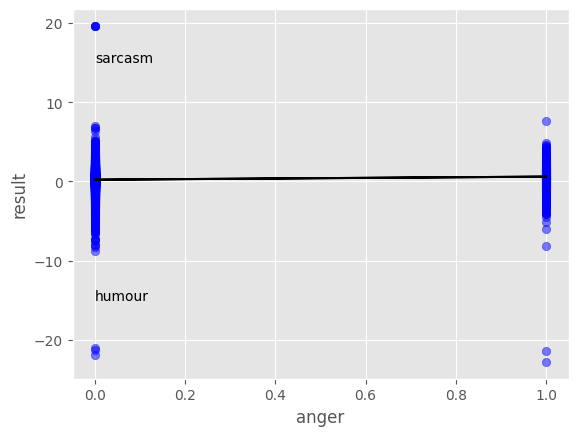

In [178]:
#emotion humour-sarcasm difference
emotionHSDf = pd.DataFrame(emotionResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=emotionHSDf.result.values.reshape(-1, 1)

X=emotionHSDf.anger.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("anger")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("sarcasm", (0,15))


Text(0, 15, 'sarcasm')

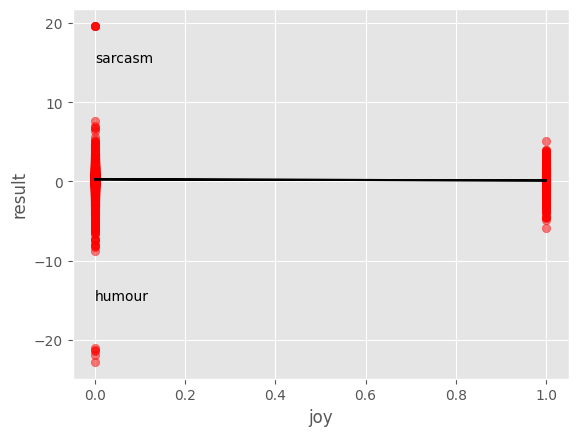

In [179]:
X=emotionHSDf.joy.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("joy")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("sarcasm", (0,15))

Text(0, 15, 'sarcasm')

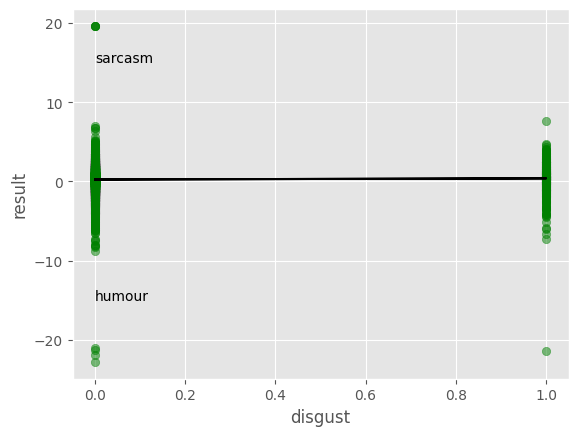

In [180]:
X=emotionHSDf.disgust.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("disgust")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("sarcasm", (0,15))

Text(0, 15, 'sarcasm')

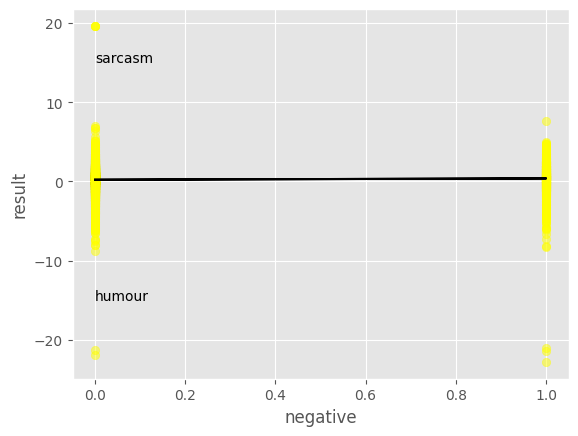

In [181]:
X=emotionHSDf.negative.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="yellow", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("negative")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("sarcasm", (0,15))

Text(0, 15, 'sarcasm')

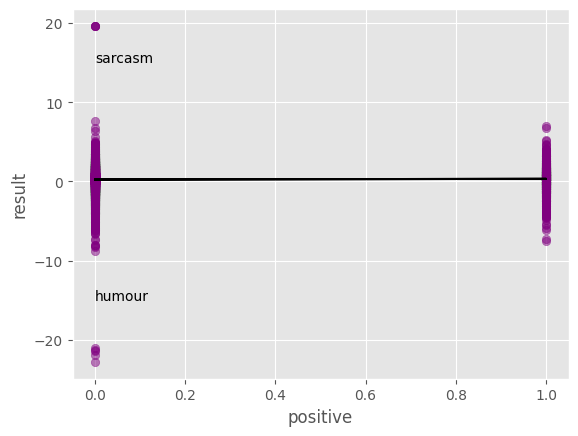

In [182]:
X=emotionHSDf.positive.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="purple", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("positive")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("sarcasm", (0,15))

In [183]:
#humour vs irony
emotionResults = {}

for i, row in humourCoocDf.iterrows() : 
    ironyNum = ironyCoocDf._get_value(i, 'result')
    humourNum = row['result']
    tempRes = ironyNum - humourNum
    emotionResults[i] = {
        'result' : tempRes,
       'anger' : row['anger'],
        'disgust' : row['disgust'],
        'joy' : row['joy'],
        'negative' : row['negative'],
        'positive' : row['positive']
    }

Text(0, 15, 'irony')

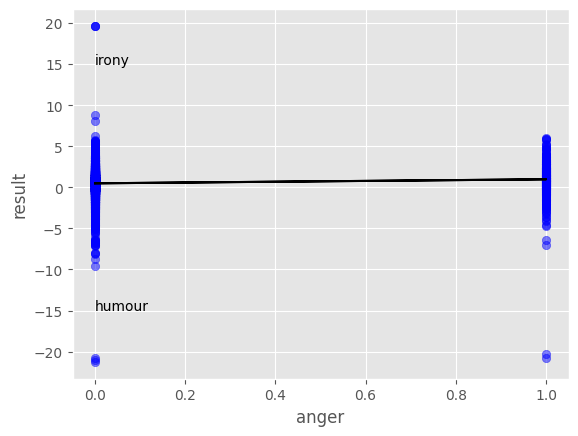

In [184]:
#emotion humour-irony difference
emotionHIDf = pd.DataFrame(emotionResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=emotionHIDf.result.values.reshape(-1, 1)

X=emotionHIDf.anger.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("anger")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

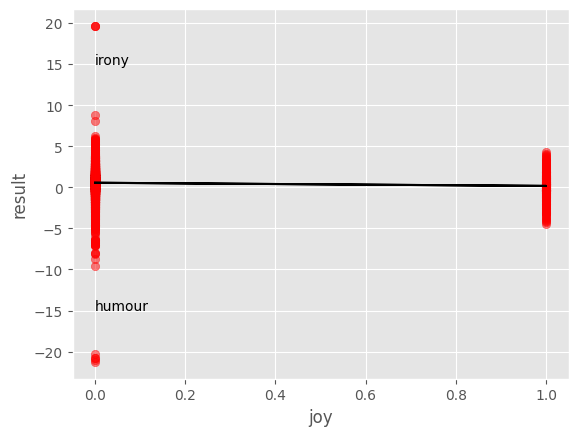

In [185]:
X=emotionHIDf.joy.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("joy")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

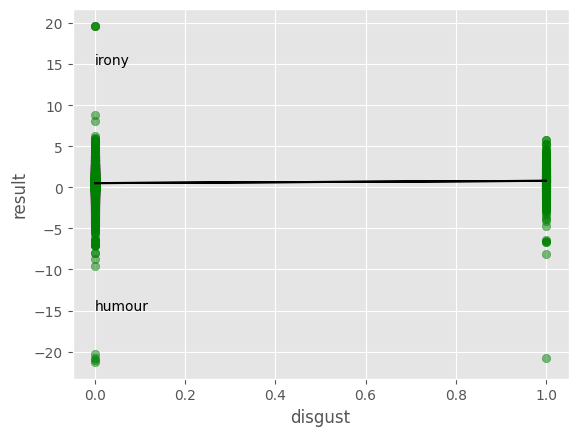

In [186]:
X=emotionHIDf.disgust.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("disgust")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

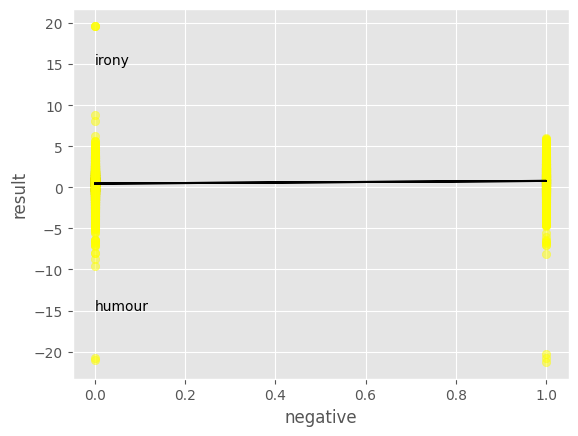

In [187]:
X=emotionHIDf.negative.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="yellow", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("negative")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

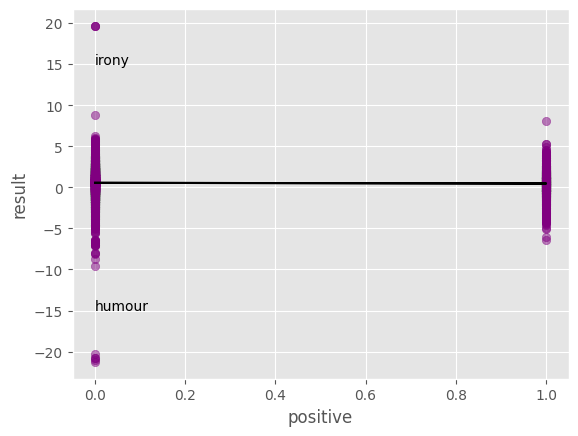

In [188]:
X=emotionHIDf.positive.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="purple", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("positive")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("irony", (0,15))

In [213]:
#humour vs realtalk
emotionResults = {}

for i, row in humourCoocDf.iterrows() : 
    #print(i)
    realtalkNum = realtalkCoocDf._get_value(i, 'result')
    humourNum = row['result']
    tempRes = realtalkNum - humourNum
    emotionResults[i] = {
        'result' : tempRes,
        'anger' : row['anger'],
        'disgust' : row['disgust'],
        'joy' : row['joy'],
        'negative' : row['negative'],
        'positive' : row['positive']
    }

Text(0, 15, 'realtalk')

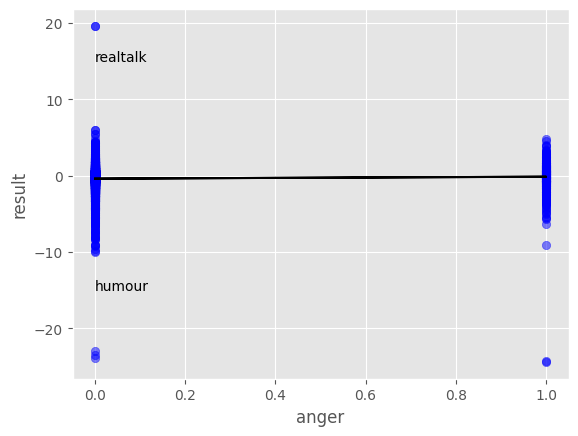

In [214]:
#emotion humour-realtalk difference
emotionHRDf = pd.DataFrame(emotionResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=emotionHRDf.result.values.reshape(-1, 1)

X=emotionHRDf.anger.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("anger")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("realtalk", (0,15))

Text(0, 15, 'realtalk')

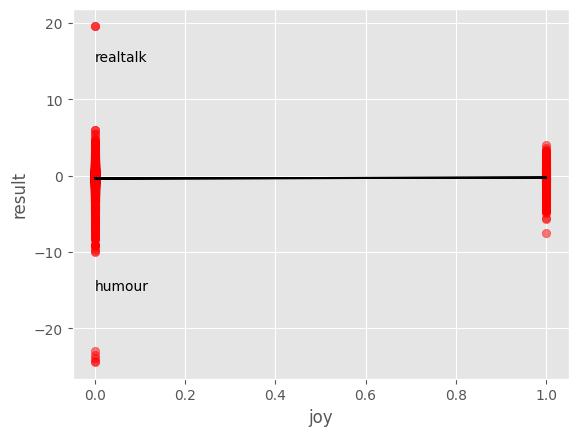

In [215]:
X=emotionHRDf.joy.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("joy")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("realtalk", (0,15))

Text(0, 15, 'realtalk')

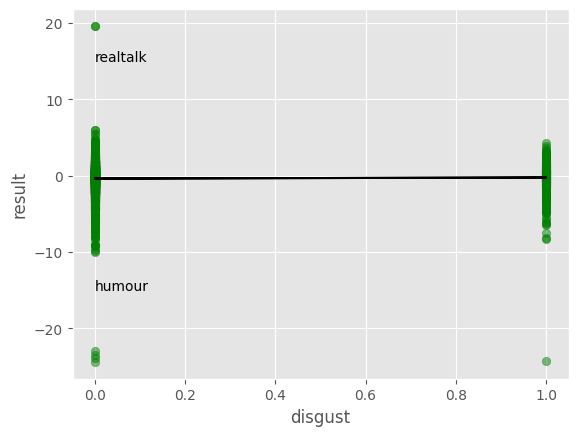

In [216]:
X=emotionHRDf.disgust.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("disgust")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("realtalk", (0,15))

Text(0, 15, 'realtalk')

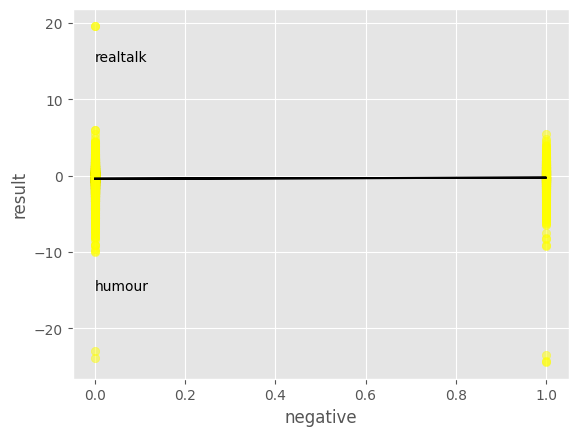

In [217]:
X=emotionHRDf.negative.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="yellow", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("negative")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("realtalk", (0,15))

Text(0, 15, 'realtalk')

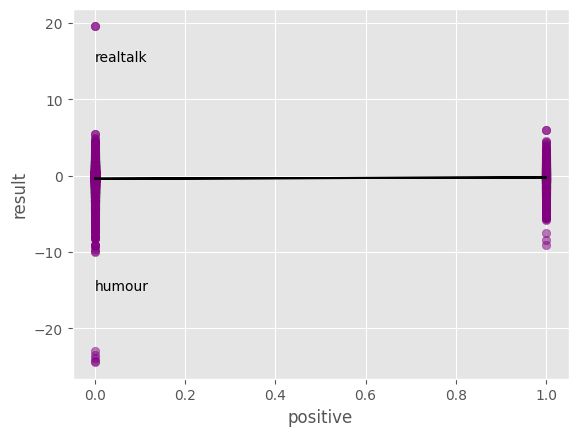

In [218]:
X=emotionHRDf.positive.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="purple", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("positive")
plt.ylabel("result")
plt.annotate("humour", (0,-15))
plt.annotate("realtalk", (0,15))

In [219]:
#sarcasm vs irony
emotionResults = {}

for i, row in sarcasmCoocDf.iterrows() : 
    ironyNum = ironyCoocDf._get_value(i, 'result')
    sarcasmNum = row['result']
    tempRes = ironyNum - sarcasmNum
    emotionResults[i] = {
        'result' : tempRes,
       'anger' : row['anger'],
        'disgust' : row['disgust'],
        'joy' : row['joy'],
        'negative' : row['negative'],
        'positive' : row['positive']
    }

Text(0, 15, 'irony')

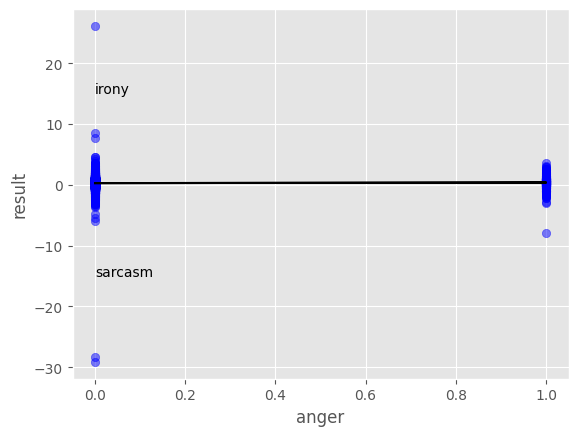

In [220]:
emotionSIDf = pd.DataFrame(emotionResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=emotionSIDf.result.values.reshape(-1, 1)

X=emotionSIDf.anger.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("anger")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

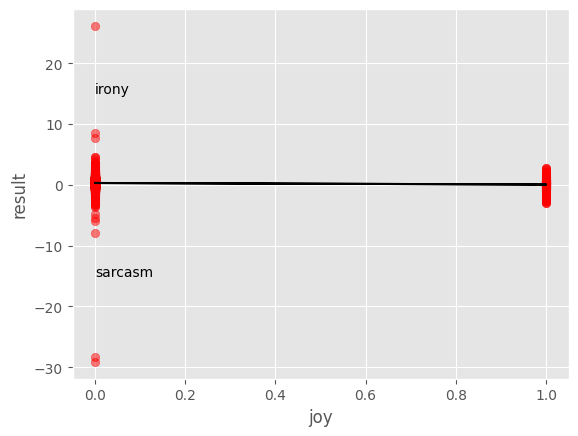

In [221]:
X=emotionSIDf.joy.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("joy")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

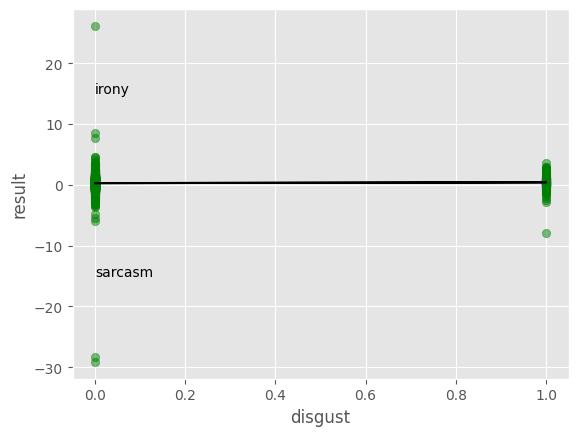

In [222]:
X=emotionSIDf.disgust.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("disgust")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

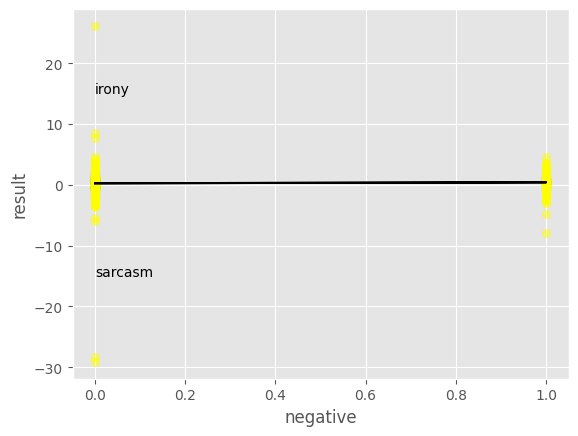

In [223]:
X=emotionSIDf.negative.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="yellow", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("negative")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("irony", (0,15))

Text(0, 15, 'irony')

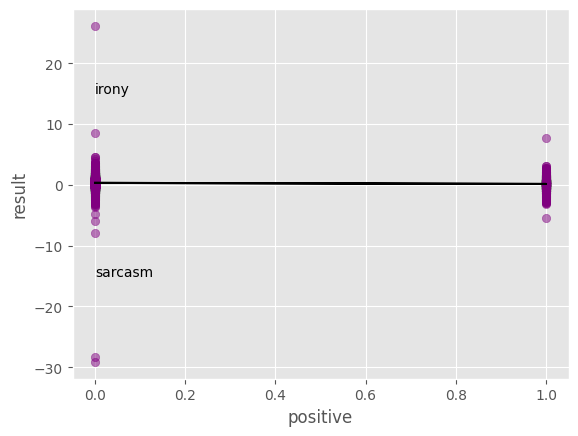

In [224]:
X=emotionSIDf.positive.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="purple", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("positive")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("irony", (0,15))

In [225]:
#sarcasm vs realtalk
emotionResults = {}

for i, row in sarcasmCoocDf.iterrows() : 
    realtalkNum = realtalkCoocDf._get_value(i, 'result')
    sarcasmNum = row['result']
    tempRes = realtalkNum - sarcasmNum
    emotionResults[i] = {
        'result' : tempRes,
       'anger' : row['anger'],
        'disgust' : row['disgust'],
        'joy' : row['joy'],
        'negative' : row['negative'],
        'positive' : row['positive']
    }

Text(0, 5, 'realtalk')

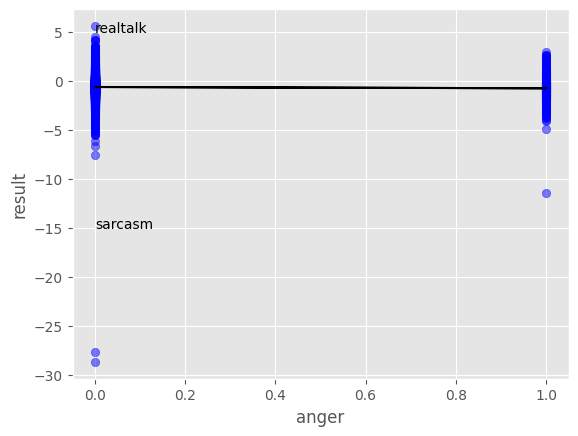

In [226]:
#emotion sarcasm-realtalk difference
emotionSRDf = pd.DataFrame(emotionResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=emotionSRDf.result.values.reshape(-1, 1)

X=emotionSRDf.anger.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("anger")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("realtalk", (0,5))

Text(0, 5, 'realtalk')

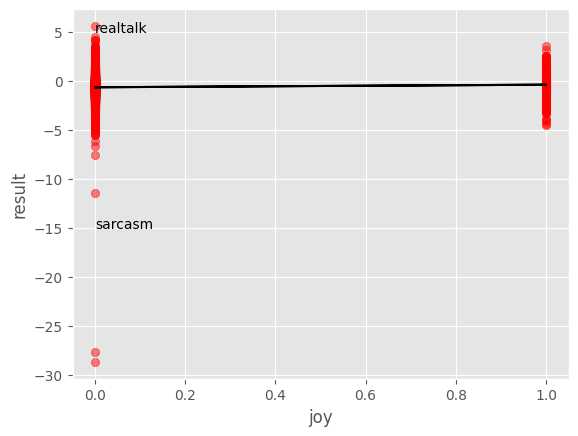

In [227]:
X=emotionSRDf.joy.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("joy")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("realtalk", (0,5))

Text(0, 5, 'realtalk')

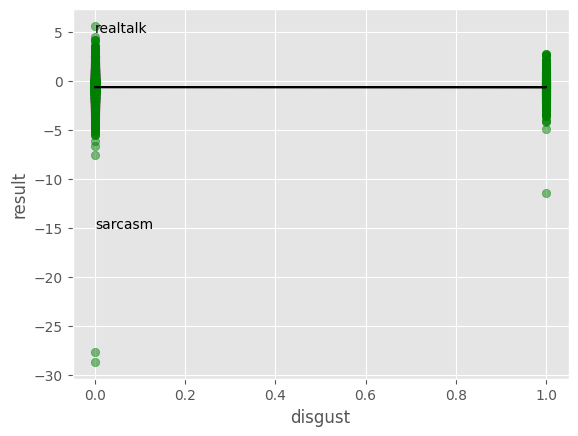

In [228]:
X=emotionSRDf.disgust.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("disgust")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("realtalk", (0,5))

Text(0, 5, 'realtalk')

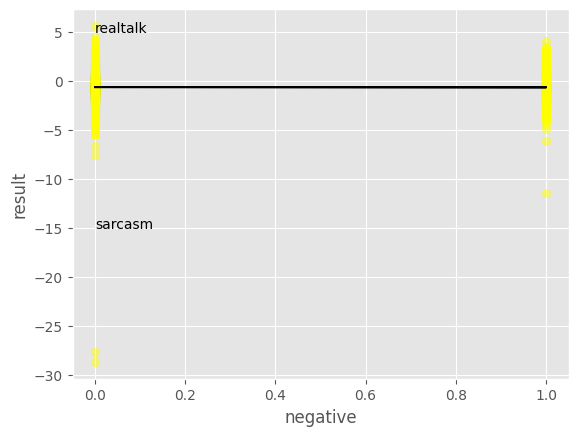

In [229]:
X=emotionSRDf.negative.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="yellow", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("negative")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("realtalk", (0,5))

Text(0, 5, 'realtalk')

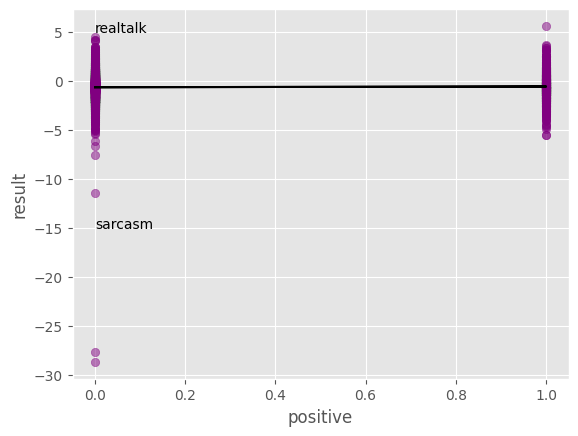

In [230]:
X=emotionSRDf.positive.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="purple", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("positive")
plt.ylabel("result")
plt.annotate("sarcasm", (0,-15))
plt.annotate("realtalk", (0,5))

In [231]:
#irony vs realtalk
emotionResults = {}

for i, row in ironyCoocDf.iterrows() : 
    realtalkNum = realtalkCoocDf._get_value(i, 'result')
    ironyNum = row['result']
    tempRes = realtalkNum - ironyNum
    emotionResults[i] = {
        'result' : tempRes,
       'anger' : row['anger'],
        'disgust' : row['disgust'],
        'joy' : row['joy'],
        'negative' : row['negative'],
        'positive' : row['positive']
    }

Text(0, 15, 'realtalk')

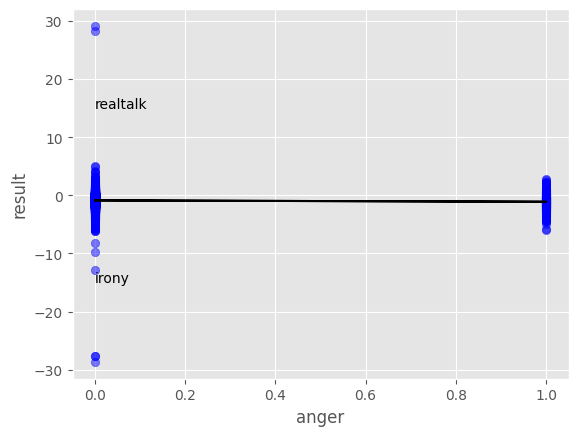

In [232]:
#emotion irony-realtalk difference
emotionIRDf = pd.DataFrame(emotionResults).T
linear_regressor = LinearRegression()  # create object for the class
Y=emotionIRDf.result.values.reshape(-1, 1)

X=emotionIRDf.anger.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="blue", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("anger")
plt.ylabel("result")
plt.annotate("irony", (0,-15))
plt.annotate("realtalk", (0,15))

Text(0, 15, 'realtalk')

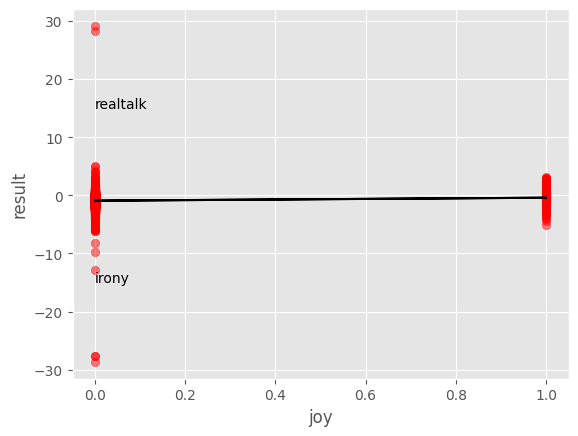

In [233]:
X=emotionIRDf.joy.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="red", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("joy")
plt.ylabel("result")
plt.annotate("irony", (0,-15))
plt.annotate("realtalk", (0,15))

Text(0, 15, 'realtalk')

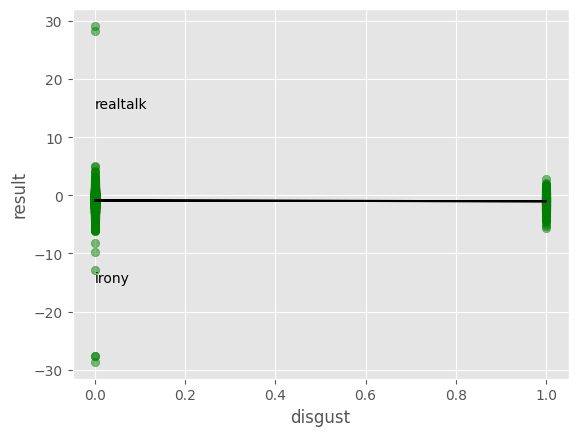

In [234]:
X=emotionIRDf.disgust.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="green", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("disgust")
plt.ylabel("result")
plt.annotate("irony", (0,-15))
plt.annotate("realtalk", (0,15))

Text(0, 15, 'realtalk')

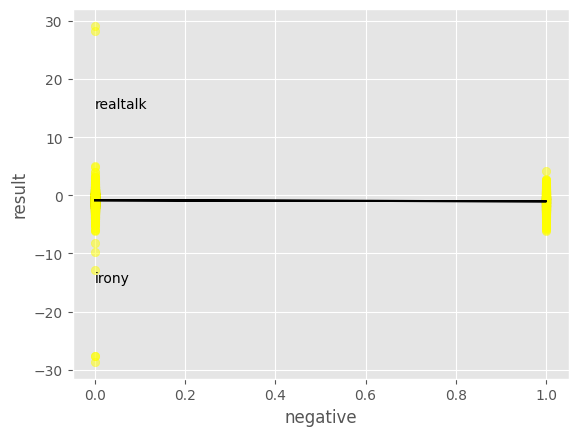

In [235]:
X=emotionIRDf.negative.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="yellow", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("negative")
plt.ylabel("result")
plt.annotate("irony", (0,-15))
plt.annotate("realtalk", (0,15))

Text(0, 15, 'realtalk')

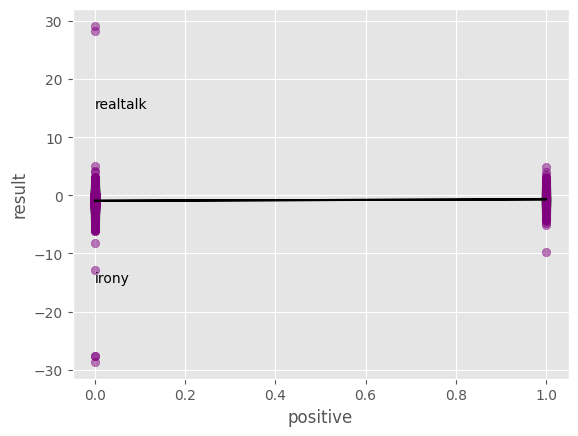

In [236]:
X=emotionIRDf.positive.values.reshape(-1, 1)
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax=plt.scatter(X, Y, c="purple", alpha=0.5)
plt.plot(X, Y_pred, color='black')
plt.xlabel("positive")
plt.ylabel("result")
plt.annotate("irony", (0,-15))
plt.annotate("realtalk", (0,15))

# LINEAR REGRESSION

In [382]:
#LINEAR REGRESSION

In [383]:
#!pip install scikit-learn
from sklearn.linear_model import LinearRegression

In [85]:
lm = LinearRegression() 

In [86]:
lm

LinearRegression()